## Introducción

Entrenamiento de modelo preentrenado para resolver el problema de predecir el ángulo del auto en base a la imagen.

Fuertemente basado en:
- https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

## Imports

In [2]:
import torch
import dataset_modules.image_preloader as image_preloader
import main
import importlib
import dataset_modules.preloaded_one_part_dataset as popd
import torchvision.transforms as transforms

importlib.reload(main)
importlib.reload(popd)

<module 'dataset_modules.preloaded_one_part_dataset' from '/clusteruy/home/franco.cuevas/tesis-jupyters-2/dataset_modules/preloaded_one_part_dataset.py'>

## Variables

In [3]:
FEATURE_EXTRACTION = False

device_string = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_string)

if device_string == "cuda":
    print("Usando GPU!")

Usando GPU!


In [ ]:
# preload images
preloaded_images = image_preloader.preload_images(
        images_folder='./dataset_modules/imgs/', 
        state_file='./dataset_modules/state.json', 
        resize_to=224
)

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: farol_trasero_derecho_sano, #1185, 87.91%
Class: farol_trasero_derecho_roto, #163, 12.09%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: farol_trasero_derecho_sano, #292, 88.22%
Class: farol_trasero_derecho_roto, #39, 11.78%
#TRAIN 1348 #TEST 331
Epoch 0/99
----------
train Loss: 0.3896 Main metric (macro_f1): 0.4809 Time: 11.81s
test Loss: 0.3719 Main metric (macro_f1): 0.4687 Time: 1.35s
Epoch 1/99
----------
train Loss: 0.3614 Main metric (macro_f1): 0.4678 Time: 11.12s
test Loss: 0.3678 Main metric (macro_f1): 0.4687 Time: 1.38s
ES Module Best: 0.3678105170993286, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.3488 Main metric (macro_f1): 0.4678 Time: 11.06s
test Loss: 0.3630 Main metric (macro_f1): 0.4687 Time: 1.41s
ES Module Best: 0.36300747938386624, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.3366 Main metric (macro_f1): 0.4678 Time: 11.17s
test Loss: 0.3595 Main metric (macro_f1): 0.4687 Time: 1.33s
ES Module Best: 0.35

,class,precision,recall,f1
0,farol_trasero_derecho_roto,0.600000,0.076923,0.136364
1,farol_trasero_derecho_sano,0.889571,0.993151,0.938511


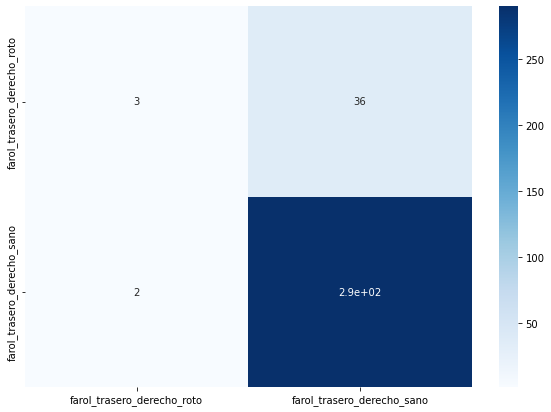

In [4]:
part = "Farol Trasero Derecho"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "farol_tra_der_only_metadata"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=False
)

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: farol_trasero_derecho_sano, #1284, 95.25%
Class: farol_trasero_derecho_roto, #64, 4.75%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: farol_trasero_derecho_sano, #322, 97.28%
Class: farol_trasero_derecho_roto, #9, 2.72%
#TRAIN 1348 #TEST 331
Epoch 0/99
----------
train Loss: 0.2192 Main metric (macro_f1): 0.5009 Time: 11.19s
test Loss: 0.1376 Main metric (macro_f1): 0.4931 Time: 1.37s
Epoch 1/99
----------
train Loss: 0.1875 Main metric (macro_f1): 0.4878 Time: 11.04s
test Loss: 0.1299 Main metric (macro_f1): 0.4931 Time: 1.33s
ES Module Best: 0.1298780935138374, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.1807 Main metric (macro_f1): 0.4878 Time: 11.01s
test Loss: 0.1292 Main metric (macro_f1): 0.4931 Time: 1.36s
ES Module Best: 0.12923948957480694, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.1752 Main metric (macro_f1): 0.4878 Time: 11.13s
test Loss: 0.1320 Main metric (macro_f1): 0.4931 Time: 1.32s
ES Module Best: 0.129239

,class,precision,recall,f1
0,farol_trasero_derecho_roto,1.000000,0.111111,0.20000
1,farol_trasero_derecho_sano,0.975758,1.000000,0.98773


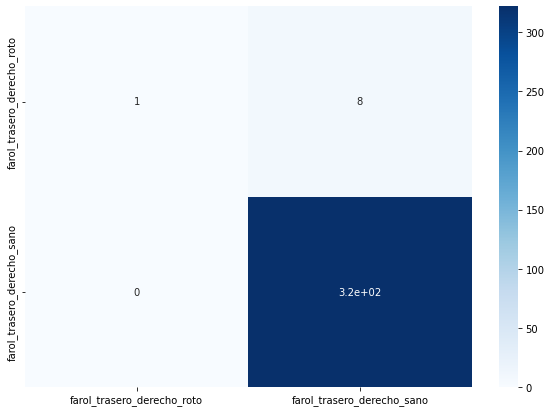

In [5]:
part = "Farol Trasero Derecho"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "farol_tra_der-selected-parts"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: farol_trasero_izquierdo_sano, #1139, 85.96%
Class: farol_trasero_izquierdo_roto, #186, 14.04%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: farol_trasero_izquierdo_sano, #290, 87.88%
Class: farol_trasero_izquierdo_roto, #40, 12.12%
#TRAIN 1325 #TEST 330
Epoch 0/99
----------
train Loss: 0.4341 Main metric (macro_f1): 0.4621 Time: 10.94s
test Loss: 0.3820 Main metric (macro_f1): 0.4677 Time: 1.36s
Epoch 1/99
----------
train Loss: 0.4022 Main metric (macro_f1): 0.4623 Time: 10.90s
test Loss: 0.3760 Main metric (macro_f1): 0.4677 Time: 1.33s
ES Module Best: 0.3760276077371655, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.3910 Main metric (macro_f1): 0.4623 Time: 10.84s
test Loss: 0.3734 Main metric (macro_f1): 0.4677 Time: 1.34s
ES Module Best: 0.3734385522929105, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.3756 Main metric (macro_f1): 0.4623 Time: 10.86s
test Loss: 0.3691 Main metric (macro_f1): 0.4677 Time: 1.35s
ES Module Bes

,class,precision,recall,f1
0,farol_trasero_izquierdo_roto,0.000000,0.0,0.000000
1,farol_trasero_izquierdo_sano,0.878788,1.0,0.935484


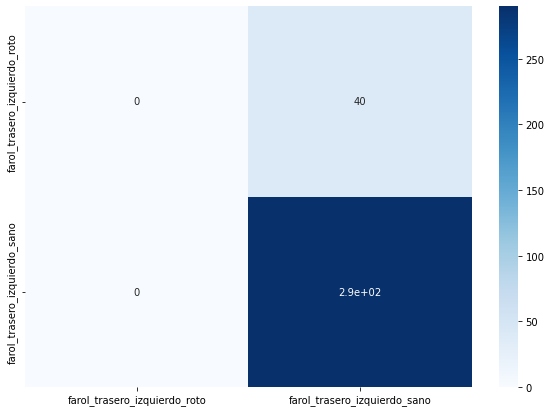

In [6]:
part = "Farol Trasero Izquierdo"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "farol_tra_izq_only_metadata"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=False
)

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: farol_trasero_izquierdo_sano, #1246, 94.04%
Class: farol_trasero_izquierdo_roto, #79, 5.96%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: farol_trasero_izquierdo_sano, #316, 95.76%
Class: farol_trasero_izquierdo_roto, #14, 4.24%
#TRAIN 1325 #TEST 330
Epoch 0/99
----------
train Loss: 0.2504 Main metric (macro_f1): 0.4820 Time: 10.94s
test Loss: 0.1795 Main metric (macro_f1): 0.4892 Time: 1.36s
Epoch 1/99
----------
train Loss: 0.2232 Main metric (macro_f1): 0.4846 Time: 10.82s
test Loss: 0.1768 Main metric (macro_f1): 0.4892 Time: 1.31s
ES Module Best: 0.17678871154785156, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.2175 Main metric (macro_f1): 0.4846 Time: 10.87s
test Loss: 0.1757 Main metric (macro_f1): 0.4892 Time: 1.45s
ES Module Best: 0.1757014634031238, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.2103 Main metric (macro_f1): 0.4846 Time: 10.89s
test Loss: 0.1755 Main metric (macro_f1): 0.4892 Time: 1.34s
ES Module Best:

,class,precision,recall,f1
0,farol_trasero_izquierdo_roto,0.000000,0.0,0.000000
1,farol_trasero_izquierdo_sano,0.957576,1.0,0.978328


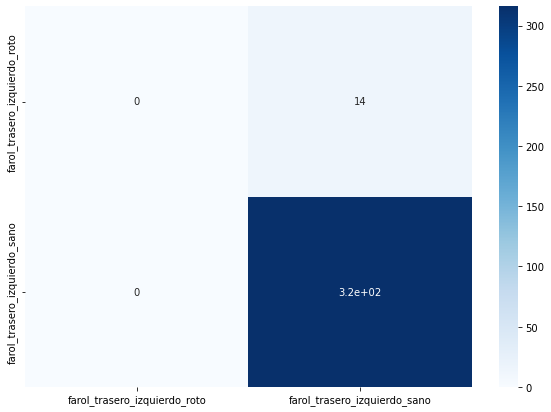

In [7]:
part = "Farol Trasero Izquierdo"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "farol_tra_izq-selected-parts"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: farol_delantero_derecho_sano, #898, 69.24%
Class: farol_delantero_derecho_roto, #399, 30.76%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: farol_delantero_derecho_sano, #215, 65.55%
Class: farol_delantero_derecho_roto, #113, 34.45%
#TRAIN 1297 #TEST 328
Epoch 0/99
----------
train Loss: 0.6390 Main metric (macro_f1): 0.4806 Time: 13.98s
test Loss: 0.6328 Main metric (macro_f1): 0.4055 Time: 1.43s
Epoch 1/99
----------
train Loss: 0.5963 Main metric (macro_f1): 0.5089 Time: 13.06s
test Loss: 0.6187 Main metric (macro_f1): 0.5911 Time: 1.43s
ES Module Best: 0.6187148283167583, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.5576 Main metric (macro_f1): 0.5708 Time: 13.07s
test Loss: 0.6322 Main metric (macro_f1): 0.6091 Time: 1.43s
ES Module Best: 0.6187148283167583, BadEpochs: 1
Epoch 3/99
----------
train Loss: 0.5405 Main metric (macro_f1): 0.6133 Time: 13.06s
test Loss: 0.6287 Main metric (macro_f1): 0.5548 Time: 1.42s
ES Module Bes

,class,precision,recall,f1
0,farol_delantero_derecho_roto,0.583333,0.433628,0.497462
1,farol_delantero_derecho_sano,0.737705,0.837209,0.784314


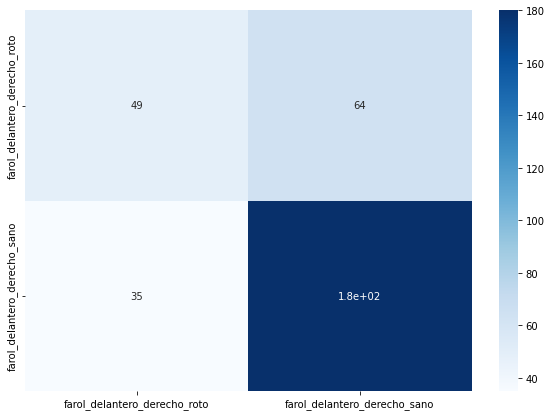

In [6]:
part = "Farol Delantero Derecho"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "farol_del_der_only_metadata"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=False
)

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: farol_delantero_derecho_sano, #1120, 86.35%
Class: farol_delantero_derecho_roto, #177, 13.65%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: farol_delantero_derecho_sano, #274, 83.54%
Class: farol_delantero_derecho_roto, #54, 16.46%
#TRAIN 1297 #TEST 328
Epoch 0/99
----------
train Loss: 0.4073 Main metric (macro_f1): 0.4911 Time: 29.38s
test Loss: 0.4278 Main metric (macro_f1): 0.4551 Time: 1.46s
Epoch 1/99
----------
train Loss: 0.3600 Main metric (macro_f1): 0.5168 Time: 13.23s
test Loss: 0.4151 Main metric (macro_f1): 0.4741 Time: 1.48s
ES Module Best: 0.41510393088910635, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.3362 Main metric (macro_f1): 0.5471 Time: 13.21s
test Loss: 0.7152 Main metric (macro_f1): 0.5002 Time: 6.25s
ES Module Best: 0.41510393088910635, BadEpochs: 1
Epoch 3/99
----------
train Loss: 0.3181 Main metric (macro_f1): 0.6204 Time: 13.25s
test Loss: 0.4502 Main metric (macro_f1): 0.5414 Time: 1.54s
ES Module B

,class,precision,recall,f1
0,farol_delantero_derecho_roto,1.00000,0.018519,0.036364
1,farol_delantero_derecho_sano,0.83792,1.000000,0.911814


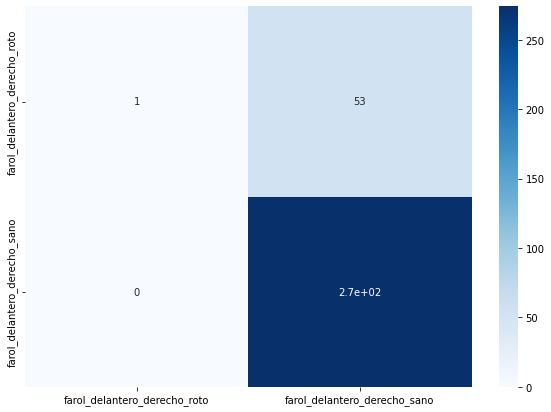

In [5]:
part = "Farol Delantero Derecho"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "farol_del_der-selected-parts"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)

----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #3132, 89.64%
Class: puerta_delantera_roto, #362, 10.36%
3494
tensor([4.8260, 0.5578])
LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #2525, 90.08%
Class: puerta_delantera_roto, #278, 9.92%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #607, 87.84%
Class: puerta_delantera_roto, #84, 12.16%
#TRAIN 2803 #TEST 691
Epoch 0/99
----------
train Loss: 0.6868 Main metric (macro_f1): 0.5031 Time: 20.99s
test Loss: 0.7284 Main metric (macro_f1): 0.4676 Time: 2.82s
Epoch 1/99
----------
train Loss: 0.6215 Main metric (macro_f1): 0.5851 Time: 23.01s
test Loss: 0.6820 Main metric (macro_f1): 0.5606 Time: 2.77s
ES Module Best: 0.6819707358797794, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.5716 Main metric (macro_f1): 0.6297 Time: 22.87s
test Loss: 0.6869 Main metric (macro_f1): 0.5738 Time: 2.84s
ES Module Best: 0.6819707358797794, BadEpochs: 1
Epoch 3/99
----------
train Loss: 0.4909

,class,precision,recall,f1
0,puerta_delantera_roto,0.363636,0.380952,0.372093
1,puerta_delantera_sano,0.913765,0.907743,0.910744


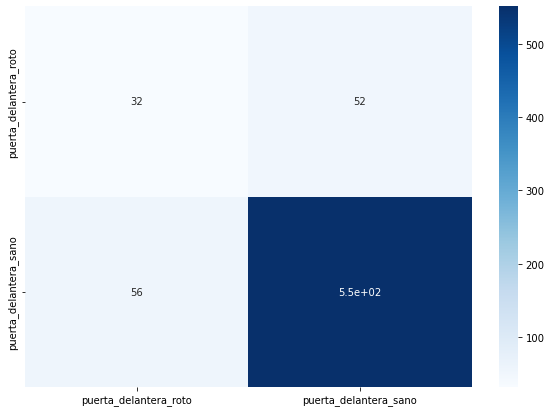

In [6]:
import sklearn
part = "Puerta Delantera"
dataset = popd.PreloadedOnePartDataset(
    part,
    preloaded_images,
    remove_not_visible=True,
    use_selected_parts=True
)

print(len(dataset.samples))
y = [y_s for (_,y_s,_) in dataset.samples]
balanced_weights = sklearn.utils.class_weight.compute_class_weight('balanced', classes=[0,1], y=y)
balanced_weights = torch.tensor(balanced_weights,dtype=torch.float)
print(balanced_weights)

MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "puerta-delantera_use-selected-parts_balanced-weights"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True,
    class_weights=balanced_weights
)

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #2525, 81.95%
Class: puerta_delantera_roto, #556, 18.05%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: puerta_delantera_sano, #607, 87.84%
Class: puerta_delantera_roto, #84, 12.16%
#TRAIN 3081 #TEST 691
Epoch 0/99
----------
train Loss: 0.4718 Main metric (macro_f1): 0.4492 Time: 25.54s
test Loss: 0.3865 Main metric (macro_f1): 0.4676 Time: 2.82s
Epoch 1/99
----------
train Loss: 0.4420 Main metric (macro_f1): 0.4504 Time: 25.17s
test Loss: 0.3546 Main metric (macro_f1): 0.4676 Time: 2.73s
ES Module Best: 0.35455655161016414, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.4247 Main metric (macro_f1): 0.4523 Time: 25.18s
test Loss: 0.3476 Main metric (macro_f1): 0.4676 Time: 2.74s
ES Module Best: 0.3476301179780974, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.3999 Main metric (macro_f1): 0.4671 Time: 25.10s
test Loss: 0.3569 Main metric (macro_f1): 0.5127 Time: 2.78s
ES Module Best: 0.3476301179780974, BadE

,class,precision,recall,f1
0,puerta_delantera_roto,0.435897,0.202381,0.276423
1,puerta_delantera_sano,0.897239,0.963756,0.929309


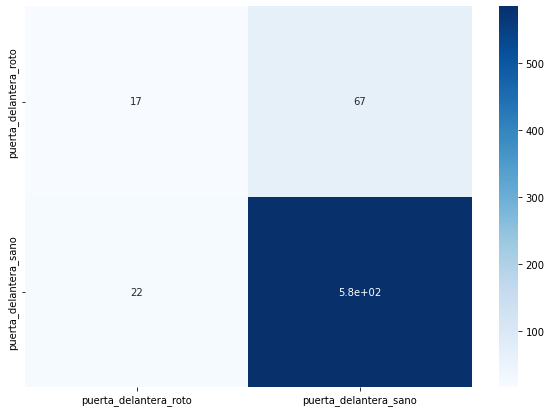

In [7]:
part = "Puerta Delantera"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "puerta-delantera_use-selected-parts_dataug"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True,
    data_augmentation=transforms.Compose([transforms.RandomHorizontalFlip(p=1)]),
    class_to_augment=0,
    offline_augmentation=278
)